In [4]:
import pandas as pd
import numpy as np 
import json

sosa_json = pd.read_json("./sosa.json")
sosa_json_expl = json.loads(sosa_json.explode('data').to_json(orient="records"))
sosa = pd.json_normalize(sosa_json_expl)
sosa

,player_id,game_id,team_id,general_position,minutes_played,data.action_type,data.goals_added_raw,data.goals_added_above_avg,data.count_actions
0,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Dribbling,-0.0235,-0.0298,6
1,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Fouling,0.0002,0.0025,1
2,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Interrupting,0.0897,0.0499,6
3,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Passing,0.0411,0.0162,40
4,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Receiving,0.0065,-0.0081,34
...,...,...,...,...,...,...,...,...,...
295,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Fouling,0.0003,0.0038,2
296,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Interrupting,0.0444,-0.0160,8
297,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Passing,0.0323,-0.0056,67
298,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Receiving,0.0106,-0.0116,61


In [13]:
game_ids = sosa.game_id.unique()
game_id_str = ','.join(game_ids)
games = pd.read_json(f'https://app.americansocceranalysis.com/api/v1/mls/games?game_id={game_id_str}')
games

,game_id,date_time_utc,home_score,away_score,home_team_id,away_team_id,referee_id,stadium_id,home_manager_id,away_manager_id,expanded_minutes,season_name,matchday,attendance,knockout_game,last_updated_utc
0,gpMO0VED5z,2023-03-25 23:30:00 UTC,6,1,mvzqoLZQap,KAqBN0Vqbg,4wM4voBqjB,2vQ1eawQrA,KPqjO38Q6v,7vQ7m6Y5D1,97,2023,5,19249,False,2023-03-26 01:56:12 UTC
1,BLMvERnlQx,2023-03-18 23:30:00 UTC,5,1,KAqBN0Vqbg,WBLMvYAQxe,EGMPLlxMaY,NWMWoaeMlz,7vQ7m6Y5D1,gpMOYv1qzy,100,2023,4,42648,False,2023-03-21 00:03:04 UTC
2,a35rE6aoML,2023-03-11 17:00:00 UTC,0,3,NPqxKXZ59d,KAqBN0Vqbg,e7MzPKXqr0,KXMeOR2q64,7VqGErdMvW,7vQ7m6Y5D1,102,2023,3,31538,False,2023-03-13 22:06:03 UTC
3,Xj5YNWLaqb,2022-10-01 17:30:00 UTC,2,1,19vQ2095K6,KAqBN0Vqbg,gjMNk4v5Kp,wvq9p775Wn,LeVq3j5WOJ,7vQ7m6Y5D1,98,2022,33,33421,False,2022-10-05 13:25:22 UTC
4,a35rLgP4QL,2022-09-17 19:30:00 UTC,0,0,KAqBN0Vqbg,9z5k7Yg5A3,wvq9vKlQWn,NWMWoaeMlz,7vQ7m6Y5D1,0Oq6vPrq6D,101,2022,32,42521,False,2022-09-20 09:13:39 UTC
5,eV5DrEVYQK,2022-09-14 22:55:00 UTC,0,1,jYQJ8EW5GR,KAqBN0Vqbg,ljqExYw5x0,vzqoJrj5ap,gjMNk8v5Kp,7vQ7m6Y5D1,102,2022,31,15340,False,2022-09-17 13:27:00 UTC
6,jYQJ3E8VMG,2022-09-10 23:30:00 UTC,4,2,KAqBN0Vqbg,kRQabn8MKZ,9vQ2mPaqK6,NWMWoaeMlz,7vQ7m6Y5D1,0Oq6zkzq6D,101,2022,30,42670,False,2022-09-14 04:32:54 UTC
7,gpMO6E9DQz,2022-09-04 21:30:00 UTC,2,1,WBLMvYAQxe,KAqBN0Vqbg,4JMAYlPMKg,p6qbX06M0G,Vj58mwJq8n,7vQ7m6Y5D1,99,2022,29,24438,False,2022-09-15 12:12:39 UTC
8,BLMvDnPlqx,2022-08-31 23:00:00 UTC,4,1,9z5k7Yg5A3,KAqBN0Vqbg,2lqRG1WQr0,NWMW8ZN5lz,0Oq6vPrq6D,7vQ7m6Y5D1,101,2022,28,18214,False,2022-09-04 19:34:33 UTC
9,9Yqd3P675v,2022-08-28 20:00:00 UTC,3,2,KAqBN0Vqbg,EKXMeX3Q64,7VqG6KX5vW,NWMWoaeMlz,7vQ7m6Y5D1,OlMlzkgqLz,98,2022,27,42561,False,2022-08-31 13:55:45 UTC


In [14]:
slim_games = games[['season_name','game_id','date_time_utc','home_team_id','away_team_id','home_manager_id','away_manager_id']]
slim_games

,season_name,game_id,date_time_utc,home_team_id,away_team_id,home_manager_id,away_manager_id
0,2023,gpMO0VED5z,2023-03-25 23:30:00 UTC,mvzqoLZQap,KAqBN0Vqbg,KPqjO38Q6v,7vQ7m6Y5D1
1,2023,BLMvERnlQx,2023-03-18 23:30:00 UTC,KAqBN0Vqbg,WBLMvYAQxe,7vQ7m6Y5D1,gpMOYv1qzy
2,2023,a35rE6aoML,2023-03-11 17:00:00 UTC,NPqxKXZ59d,KAqBN0Vqbg,7VqGErdMvW,7vQ7m6Y5D1
3,2022,Xj5YNWLaqb,2022-10-01 17:30:00 UTC,19vQ2095K6,KAqBN0Vqbg,LeVq3j5WOJ,7vQ7m6Y5D1
4,2022,a35rLgP4QL,2022-09-17 19:30:00 UTC,KAqBN0Vqbg,9z5k7Yg5A3,7vQ7m6Y5D1,0Oq6vPrq6D
5,2022,eV5DrEVYQK,2022-09-14 22:55:00 UTC,jYQJ8EW5GR,KAqBN0Vqbg,gjMNk8v5Kp,7vQ7m6Y5D1
6,2022,jYQJ3E8VMG,2022-09-10 23:30:00 UTC,KAqBN0Vqbg,kRQabn8MKZ,7vQ7m6Y5D1,0Oq6zkzq6D
7,2022,gpMO6E9DQz,2022-09-04 21:30:00 UTC,WBLMvYAQxe,KAqBN0Vqbg,Vj58mwJq8n,7vQ7m6Y5D1
8,2022,BLMvDnPlqx,2022-08-31 23:00:00 UTC,9z5k7Yg5A3,KAqBN0Vqbg,0Oq6vPrq6D,7vQ7m6Y5D1
9,2022,9Yqd3P675v,2022-08-28 20:00:00 UTC,KAqBN0Vqbg,EKXMeX3Q64,7vQ7m6Y5D1,OlMlzkgqLz


In [28]:
# sosa.game_id = sosa.game_id.astype(str)
# slim_games.game_id = slim_games.game_id.astype(str)

# sosa.dtypes

joined_sosa = sosa.merge(slim_games, on='game_id')
joined_sosa

,player_id,game_id,team_id,general_position,minutes_played,data.action_type,data.goals_added_raw,data.goals_added_above_avg,data.count_actions,season_name,date_time_utc,home_team_id,away_team_id,home_manager_id,away_manager_id
0,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Dribbling,-0.0235,-0.0298,6,2022,2022-04-02 23:30:00 UTC,EKXMeX3Q64,KAqBN0Vqbg,e7MzE8XQr0,7vQ7m6Y5D1
1,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Fouling,0.0002,0.0025,1,2022,2022-04-02 23:30:00 UTC,EKXMeX3Q64,KAqBN0Vqbg,e7MzE8XQr0,7vQ7m6Y5D1
2,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Interrupting,0.0897,0.0499,6,2022,2022-04-02 23:30:00 UTC,EKXMeX3Q64,KAqBN0Vqbg,e7MzE8XQr0,7vQ7m6Y5D1
3,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Passing,0.0411,0.0162,40,2022,2022-04-02 23:30:00 UTC,EKXMeX3Q64,KAqBN0Vqbg,e7MzE8XQr0,7vQ7m6Y5D1
4,9Yqd6zwjMv,0x5gg9dZ57,KAqBN0Vqbg,DM,52,Receiving,0.0065,-0.0081,34,2022,2022-04-02 23:30:00 UTC,EKXMeX3Q64,KAqBN0Vqbg,e7MzE8XQr0,7vQ7m6Y5D1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Fouling,0.0003,0.0038,2,2022,2022-10-01 17:30:00 UTC,19vQ2095K6,KAqBN0Vqbg,LeVq3j5WOJ,7vQ7m6Y5D1
296,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Interrupting,0.0444,-0.0160,8,2022,2022-10-01 17:30:00 UTC,19vQ2095K6,KAqBN0Vqbg,LeVq3j5WOJ,7vQ7m6Y5D1
297,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Passing,0.0323,-0.0056,67,2022,2022-10-01 17:30:00 UTC,19vQ2095K6,KAqBN0Vqbg,LeVq3j5WOJ,7vQ7m6Y5D1
298,9Yqd6zwjMv,Xj5YNWLaqb,KAqBN0Vqbg,DM,79,Receiving,0.0106,-0.0116,61,2022,2022-10-01 17:30:00 UTC,19vQ2095K6,KAqBN0Vqbg,LeVq3j5WOJ,7vQ7m6Y5D1


In [34]:
grouped_sosa = joined_sosa.groupby(['season_name','team_id','player_id','game_id','date_time_utc']).agg({
    'data.goals_added_above_avg': ['sum'],
    'data.goals_added_raw': ['sum'], 
    'minutes_played' : ['mean']
}).reset_index()
grouped_sosa.columns = grouped_sosa.columns.droplevel(level=1)
grouped_sosa

,season_name,team_id,player_id,game_id,date_time_utc,data.goals_added_above_avg,data.goals_added_raw,minutes_played
0,2021,KAqBN0Vqbg,9Yqd6zwjMv,2vQ1lr6wqr,2021-08-15 20:00:00 UTC,-0.1526,0.0242,99.0
1,2021,KAqBN0Vqbg,9Yqd6zwjMv,2vQ1lrWxqr,2021-05-09 17:00:00 UTC,-0.3564,-0.1778,100.0
2,2021,KAqBN0Vqbg,9Yqd6zwjMv,315Vo8OGq9,2021-09-10 23:00:00 UTC,-0.0837,0.0914,96.0
3,2021,KAqBN0Vqbg,9Yqd6zwjMv,4wM4wdklQj,2021-08-18 23:00:00 UTC,-0.0397,0.0675,60.0
4,2021,KAqBN0Vqbg,9Yqd6zwjMv,7VqGDnw3Qv,2021-06-27 19:30:00 UTC,0.0194,0.1999,101.0
5,2021,KAqBN0Vqbg,9Yqd6zwjMv,BLMvXYgXqx,2021-05-15 23:00:00 UTC,0.1115,0.2664,99.0
6,2021,KAqBN0Vqbg,9Yqd6zwjMv,KAqBPW8ZMb,2021-08-07 23:30:00 UTC,-0.0961,0.0916,103.0
7,2021,KAqBN0Vqbg,9Yqd6zwjMv,KAqBPWg7Mb,2021-09-18 19:30:00 UTC,0.0067,0.1835,97.0
8,2021,KAqBN0Vqbg,9Yqd6zwjMv,KPqjAdP456,2021-04-25 00:00:00 UTC,-0.1492,0.0256,98.0
9,2021,KAqBN0Vqbg,9Yqd6zwjMv,NPqxXlVjq9,2021-07-09 00:30:00 UTC,-0.0720,0.1067,100.0


In [38]:
grouped_sosa.columns = ['season_name', 'team_id', 'player_id', 'game_id', 'game_date_utc',
       'goals_added_above_avg', 'goals_added_total', 'minutes_played']
grouped_sosa

,season_name,team_id,player_id,game_id,game_date_utc,goals_added_above_avg,goals_added_total,minutes_played
0,2021,KAqBN0Vqbg,9Yqd6zwjMv,2vQ1lr6wqr,2021-08-15 20:00:00+00:00,-0.1526,0.0242,99.0
1,2021,KAqBN0Vqbg,9Yqd6zwjMv,2vQ1lrWxqr,2021-05-09 17:00:00+00:00,-0.3564,-0.1778,100.0
2,2021,KAqBN0Vqbg,9Yqd6zwjMv,315Vo8OGq9,2021-09-10 23:00:00+00:00,-0.0837,0.0914,96.0
3,2021,KAqBN0Vqbg,9Yqd6zwjMv,4wM4wdklQj,2021-08-18 23:00:00+00:00,-0.0397,0.0675,60.0
4,2021,KAqBN0Vqbg,9Yqd6zwjMv,7VqGDnw3Qv,2021-06-27 19:30:00+00:00,0.0194,0.1999,101.0
5,2021,KAqBN0Vqbg,9Yqd6zwjMv,BLMvXYgXqx,2021-05-15 23:00:00+00:00,0.1115,0.2664,99.0
6,2021,KAqBN0Vqbg,9Yqd6zwjMv,KAqBPW8ZMb,2021-08-07 23:30:00+00:00,-0.0961,0.0916,103.0
7,2021,KAqBN0Vqbg,9Yqd6zwjMv,KAqBPWg7Mb,2021-09-18 19:30:00+00:00,0.0067,0.1835,97.0
8,2021,KAqBN0Vqbg,9Yqd6zwjMv,KPqjAdP456,2021-04-25 00:00:00+00:00,-0.1492,0.0256,98.0
9,2021,KAqBN0Vqbg,9Yqd6zwjMv,NPqxXlVjq9,2021-07-09 00:30:00+00:00,-0.0720,0.1067,100.0


In [39]:
grouped_sosa.game_date_utc = pd.to_datetime(grouped_sosa.game_date_utc)
grouped_sosa

,season_name,team_id,player_id,game_id,game_date_utc,goals_added_above_avg,goals_added_total,minutes_played
0,2021,KAqBN0Vqbg,9Yqd6zwjMv,2vQ1lr6wqr,2021-08-15 20:00:00+00:00,-0.1526,0.0242,99.0
1,2021,KAqBN0Vqbg,9Yqd6zwjMv,2vQ1lrWxqr,2021-05-09 17:00:00+00:00,-0.3564,-0.1778,100.0
2,2021,KAqBN0Vqbg,9Yqd6zwjMv,315Vo8OGq9,2021-09-10 23:00:00+00:00,-0.0837,0.0914,96.0
3,2021,KAqBN0Vqbg,9Yqd6zwjMv,4wM4wdklQj,2021-08-18 23:00:00+00:00,-0.0397,0.0675,60.0
4,2021,KAqBN0Vqbg,9Yqd6zwjMv,7VqGDnw3Qv,2021-06-27 19:30:00+00:00,0.0194,0.1999,101.0
5,2021,KAqBN0Vqbg,9Yqd6zwjMv,BLMvXYgXqx,2021-05-15 23:00:00+00:00,0.1115,0.2664,99.0
6,2021,KAqBN0Vqbg,9Yqd6zwjMv,KAqBPW8ZMb,2021-08-07 23:30:00+00:00,-0.0961,0.0916,103.0
7,2021,KAqBN0Vqbg,9Yqd6zwjMv,KAqBPWg7Mb,2021-09-18 19:30:00+00:00,0.0067,0.1835,97.0
8,2021,KAqBN0Vqbg,9Yqd6zwjMv,KPqjAdP456,2021-04-25 00:00:00+00:00,-0.1492,0.0256,98.0
9,2021,KAqBN0Vqbg,9Yqd6zwjMv,NPqxXlVjq9,2021-07-09 00:30:00+00:00,-0.0720,0.1067,100.0


In [67]:
# rolling
grouped_sosa['above_avg_p96'] = grouped_sosa.goals_added_above_avg / grouped_sosa.minutes_played * 96
grouped_sosa['roll_above_avg_p96'] = grouped_sosa['above_avg_p96'].rolling(5,min_periods=1, closed='both').mean()
grouped_sosa.sort_values(by='game_date_utc', inplace=True)
grouped_sosa['game_number'] = grouped_sosa.reset_index().index
grouped_sosa.head()

,season_name,team_id,player_id,game_id,game_date_utc,goals_added_above_avg,goals_added_total,minutes_played,above_avg_p96,roll_above_avg_p96,game_number
19,2021,KAqBN0Vqbg,9Yqd6zwjMv,gjMN30xB5K,2021-04-17 19:00:00+00:00,-0.0842,0.0908,98.0,-0.082482,-0.082482,0
8,2021,KAqBN0Vqbg,9Yqd6zwjMv,KPqjAdP456,2021-04-25 00:00:00+00:00,-0.1492,0.0256,98.0,-0.146155,-0.114318,1
13,2021,KAqBN0Vqbg,9Yqd6zwjMv,Xj5YkXOlQb,2021-05-01 23:00:00+00:00,-0.1123,0.0645,99.0,-0.108897,-0.112511,2
1,2021,KAqBN0Vqbg,9Yqd6zwjMv,2vQ1lrWxqr,2021-05-09 17:00:00+00:00,-0.3564,-0.1778,100.0,-0.342144,-0.169919,3
5,2021,KAqBN0Vqbg,9Yqd6zwjMv,BLMvXYgXqx,2021-05-15 23:00:00+00:00,0.1115,0.2664,99.0,0.108121,-0.114311,4


In [75]:
grouped_sosa.groupby(['season_name']).game_number.min()

season_name
2021     0
2022    26
2023    47
Name: game_number, dtype: int64

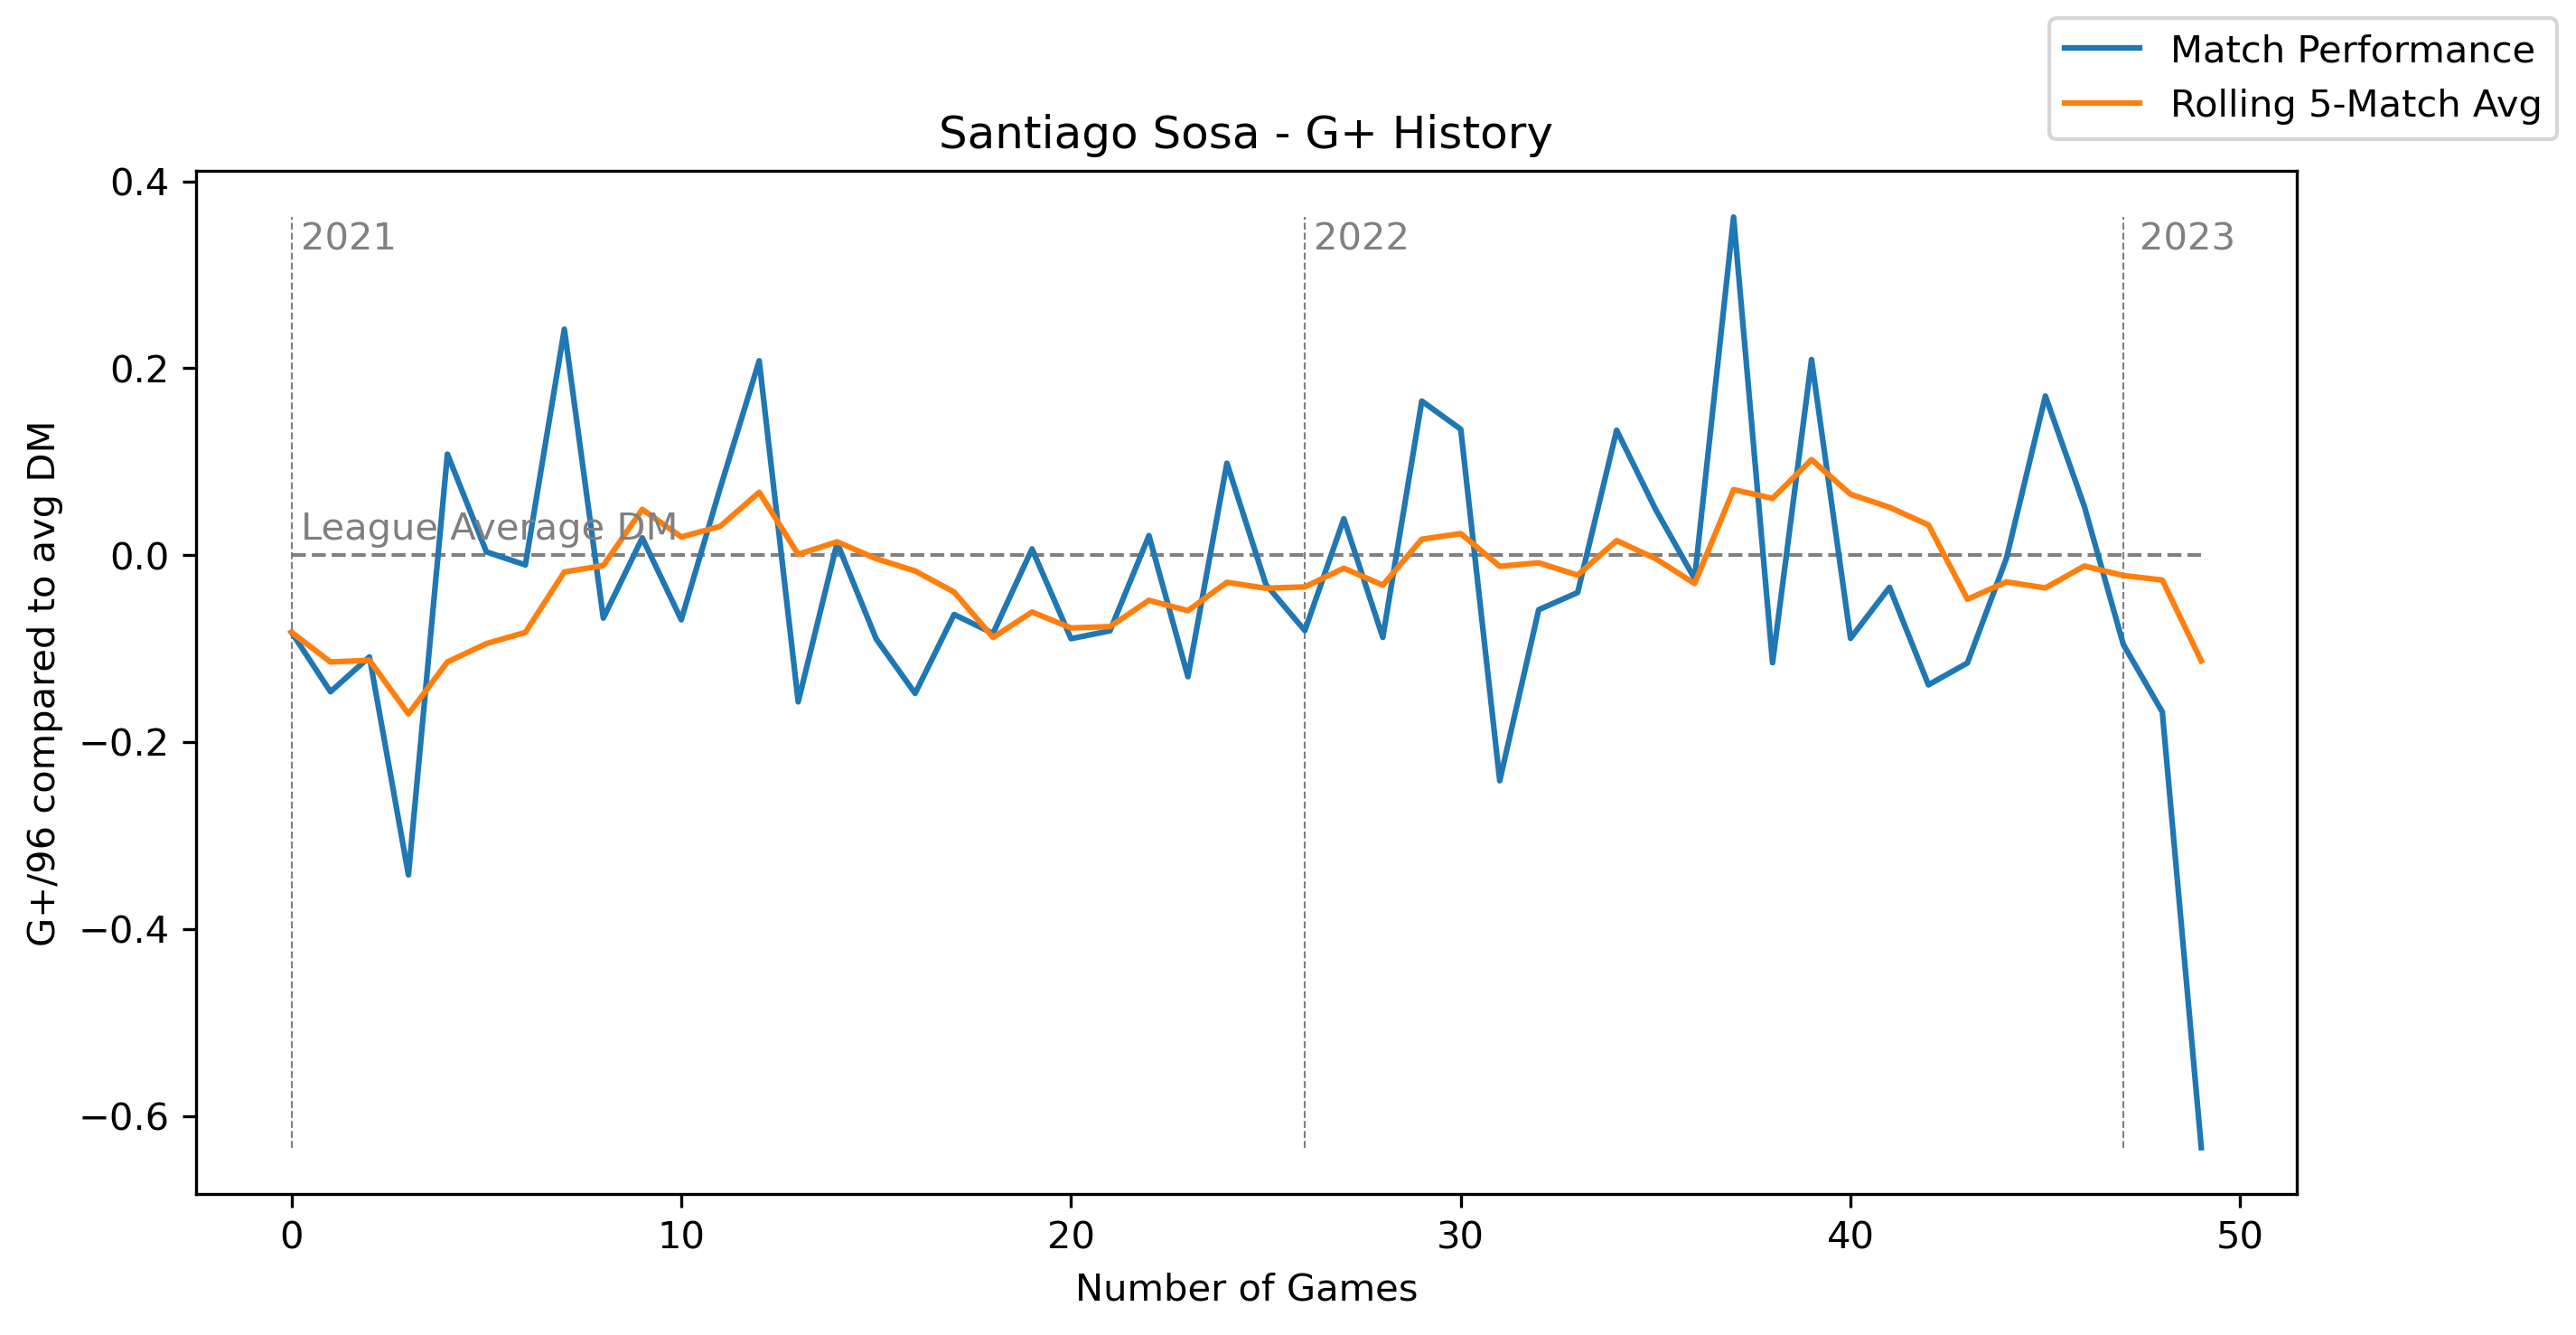

In [103]:
import matplotlib.pyplot as plt





fig, ax1 = plt.subplots()




ax1.set_ylabel("G+/96 compared to avg DM")
ax1.set_xlabel("Number of Games")

ax1.text(0.05, 0.65, 'League Average DM', horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, color='gray')
ax1.hlines(y=0.0, xmin = grouped_sosa['game_number'].min(), xmax=grouped_sosa['game_number'].max(), linewidth=1, color='gray', linestyles='dashed')


ax1.vlines(x=0.0, ymin=grouped_sosa['above_avg_p96'].min(), ymax=grouped_sosa['above_avg_p96'].max(), color='gray', linestyles='dashed', linewidth=0.5)
ax1.text(0.05, 0.95, '2021', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, color='gray')


ax1.vlines(x=26, ymin=grouped_sosa['above_avg_p96'].min(), ymax=grouped_sosa['above_avg_p96'].max(), color='gray', linestyles='dashed', linewidth=0.5)
ax1.text(0.532, 0.95, '2022', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, color='gray')


ax1.vlines(x=47, ymin=grouped_sosa['above_avg_p96'].min(), ymax=grouped_sosa['above_avg_p96'].max(), color='gray', linestyles='dashed', linewidth=0.5)
ax1.text(0.925, 0.95, '2023', horizontalalignment='left', verticalalignment='top', transform=ax1.transAxes, color='gray')


ax1.plot(grouped_sosa['game_number'], grouped_sosa['above_avg_p96'], label="Match Performance")
ax1.plot(grouped_sosa['game_number'], grouped_sosa['roll_above_avg_p96'], label="Rolling 5-Match Avg")
ax1.set_title('Santiago Sosa - G+ History')

fig.set_size_inches(10,5)
fig.legend()
fig.set_dpi(300)

plt.show()